<a href="https://colab.research.google.com/github/KavinduJ2001/Assignment_A02/blob/main/Q02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install circle_fit
!pip install tikzplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 3.4 MB/s eta 0:00:00


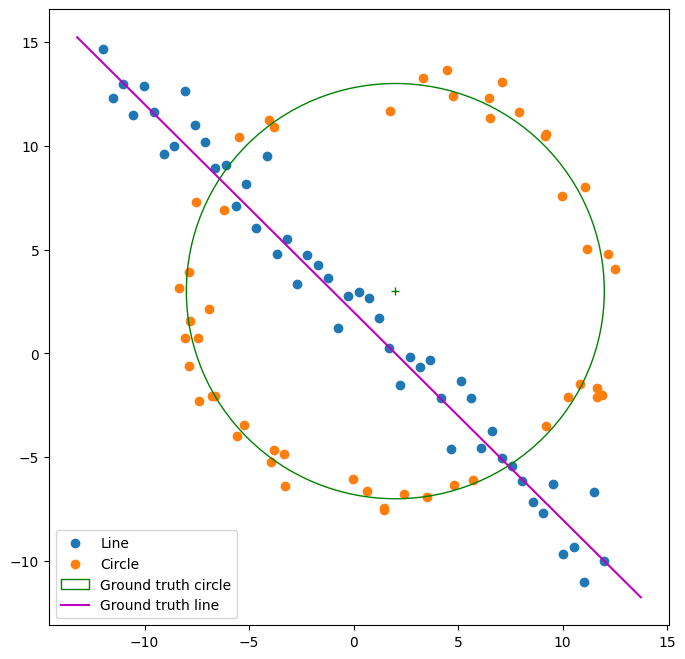

In [5]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import tikzplotlib
import circle_fit as cf

N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3
s = r / 16

t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x = x0_gt + (r + n) * np.cos(t)
y = y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.0
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

X = np.vstack((X_circ, X_line))

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot(x0_gt, y0_gt, '+', color='g')

x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')

plt.legend()
plt.show()


Best line model [0.70007676 0.71406759 2.07970898]


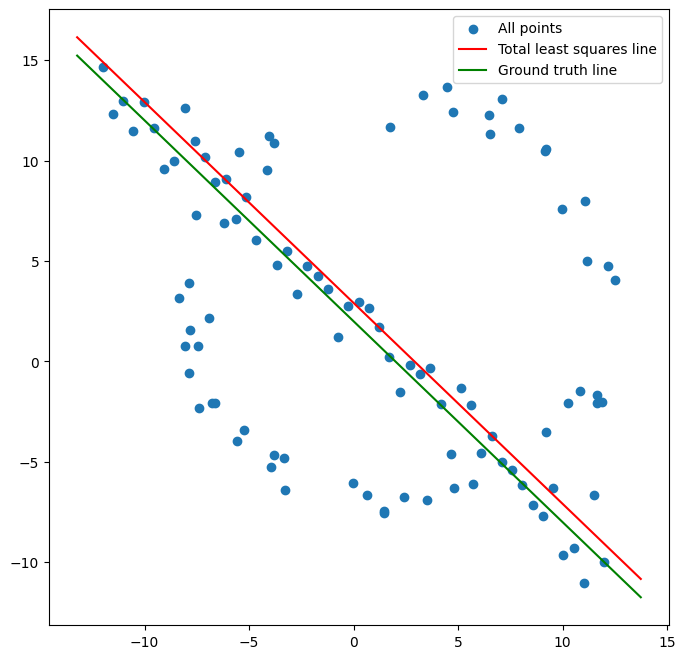

In [6]:
import math
N = X.shape[0]
X_ = X

m,c=-1,2

U = X_ - np.mean(X_, axis=0)

# Eigenvector of 𝑈^𝑇𝑈 associated with the smallest eigenvalue
_, _, Vt = np.linalg.svd(np.transpose(U)@U)
a, b = Vt[-1, 0], Vt[-1, 1]
d = a*np.mean(X_[:,0]) + b*np.mean(X_[:,1])
best_model_line = np.array([a, b, d])

print('Best line model', best_model_line)

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(X[:,0],X[:,1], label='All points')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = (-best_model_line[1]*x_ + best_model_line[2])/best_model_line[1]
plt.plot(x_, y_, label='Total least squares line',c="r")
y_ = m*x_ + c
plt.plot(x_, y_, label='Ground truth line',c="g")
plt.legend()

Number of inliers: 47
Number of outliers: 53


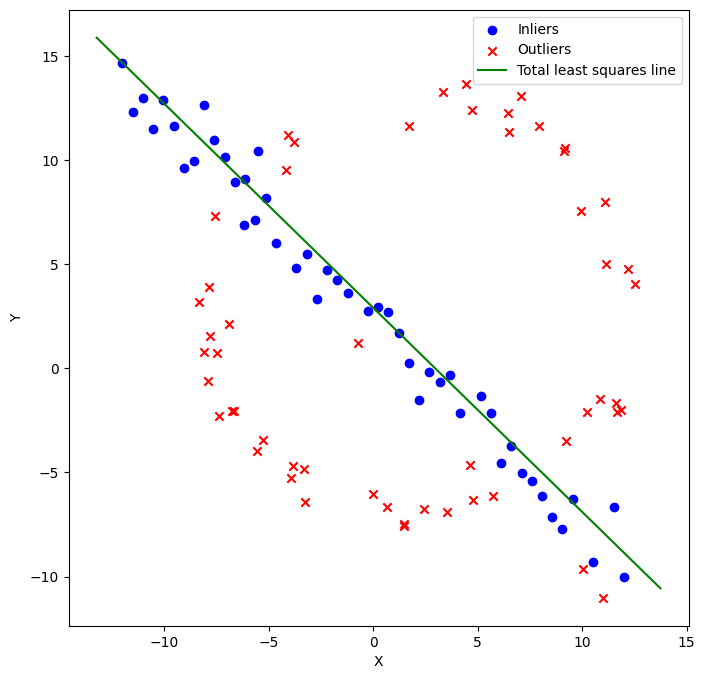

In [7]:
import numpy as np

# Define the line parameters (a, b, d) and distance threshold
a, b, d = best_model_line
distance_threshold = 1.7  # Adjust this threshold as needed

# Initialize arrays to store inliers and outliers
inliers = []
outliers = []

# Calculate and classify points as inliers or outliers
for x, y in X:
    distance = abs(a * x + b * y - d)
    if distance <= distance_threshold:
        inliers.append([x, y])
    else:
        outliers.append([x, y])

# Convert inliers and outliers to NumPy arrays
inliers = np.array(inliers)
outliers = np.array(outliers)

# Print the number of inliers and outliers
print("Number of inliers:", len(inliers))
print("Number of outliers:", len(outliers))

# Optionally, plot the inliers, outliers, and line
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(inliers[:, 0], inliers[:, 1], label='Inliers', c='b', marker='o')
ax.scatter(outliers[:, 0], outliers[:, 1], label='Outliers', c='r', marker='x')
x_min, x_max = plt.xlim()
x_values = np.array([x_min, x_max])
y_values = (-a * x_values + d) / b
plt.plot(x_values, y_values, label='Total least squares line', c="g")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


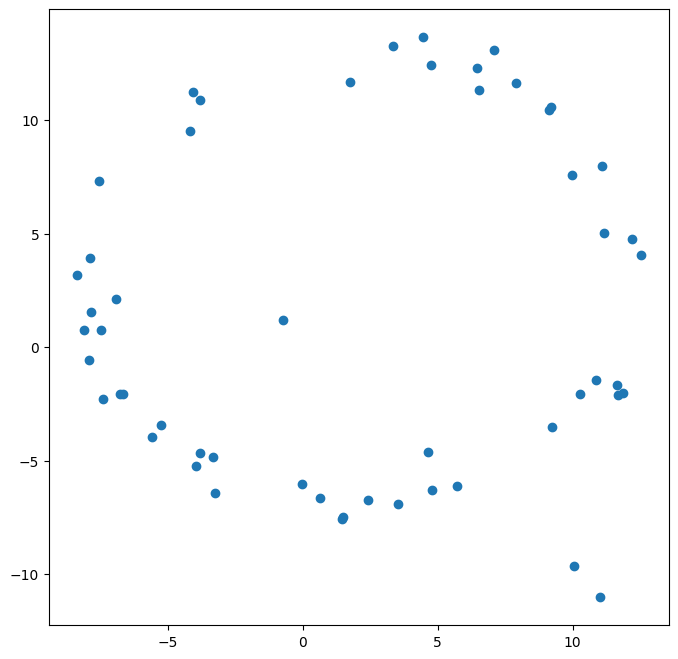

In [8]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(outliers[:,0],outliers[:,1])

In [9]:
def circ_through_points(x1, x2, x3):
    denominator_1 = ( (x1[0] - x2[0]) * (x2[1] - x3[1]) - (x2[1] - x1[1]) * (x3[0] - x2[0]) )
    denominator_2 = ( (x1[0] - x2[0]) * (x2[1] - x3[1]) - (x2[1] - x1[1]) * (x3[0] - x2[0]) )

    if denominator_1 != 0 and denominator_2 != 0:
        a = 0.5 * ( (x2[1] - x3[1]) * (x1[0]**2 + x1[1]**2 - x2[0]**2 - x2[1]**2) + (x2[1] - x1[1]) * (x2[0]**2 + x2[1]**2 - x3[0]**2 - x3[1]**2) ) / denominator_1
        b = 0.5 * ( (x1[0] - x2[0]) * (x2[0]**2 + x2[1]**2 - x3[0]**2 - x3[1]**2) + (x3[0] - x2[0]) * (x1[0]**2 + x1[1]**2 - x2[0]**2 - x2[1]**2) ) / denominator_2
        c = -x3[0]**2 - x3[1]**2 + 2*a*x3[0] + 2*b*x3[1]

        r = np.sqrt(a**2 + b**2 - c)
    else:
        a,b,r = None, None, None

    return a, b, r

def get_inlier(a, b, r, X, d):
    count = 0
    best_fit_inliers = None

    for i in range(X.shape[0]):
        distance = abs( ( (X[i,0] - a)**2 + (X[i,1] - b)**2 ) ** 0.5 - r )

        if distance < d:
            count += 1

            if type(best_fit_inliers) == type(None):
                best_fit_inliers = np.array([X[i,:]])
            else:
                best_fit_inliers = np.concatenate((best_fit_inliers, X[i,:].reshape(1, -1)), axis=0)

    return count, best_fit_inliers

In [10]:
def RANSAC(X):
    S = 3
    d = 1.96 #gaussian threshold for selecting a
    #correct outlier with p1 = 95% probability.
    e = 0.50
    p = 0.99
    N = int(np.ceil(np.log(1-p)/np.log(1-(1-e)**S)))

    best_fit_circle = None
    best_fit_x = None
    best_inlier_count = 0

    for _ in range(N):
        x = []

        for i in range(S):
            hold = X[np.random.randint(0, len(X)), :]

            if len(x) == 0:
                x.append(hold)
            elif np.array_equal(hold, x[-1]):
                while np.array_equal(hold, x[-1]):
                    hold = X[np.random.randint(0, len(X)), :]

                x.append(hold)
            else:
                x.append(hold)

        a, b, r = circ_through_points(x[0], x[1], x[2])

        if a == None:
            continue

        count, inliers = get_inlier(a, b, r, X, d)

        if count > best_inlier_count:
            best_fit_circle = plt.Circle((a, b), r, color='b', fill=False, label="Best Sample")
            best_fit_x = x
            best_fit_inliers = inliers
            best_inlier_count = count

    if best_inlier_count < e:
        print("The RANSAC algorithm did not find a suitable model")
        return None, None, None, None

    xc,yc,r,_ = cf.least_squares_circle(best_fit_inliers)

    ransac_circle = plt.Circle((xc, yc), r, color='m', fill=False, label="RANSAC")

    return ransac_circle, best_fit_circle, best_fit_x, best_fit_inliers

In [11]:
x=[]
hold = X[np.random.randint(0, len(X)), :]
x.append(hold)
hold = X[np.random.randint(0, len(X)), :]
np.array_equal(hold, x[-1])
hold

array([ 3.67346939, -0.31860238])

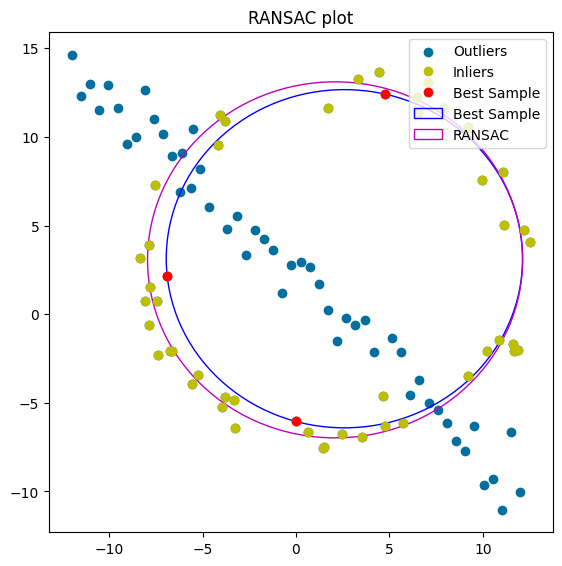

In [12]:
ransac_circle, best_fit_circle, x, inliers = RANSAC(outliers)

if ransac_circle != None:
    fig, ax = plt.subplots(1, 1, figsize=(6.5,6.5))
    ax.scatter(X_circ[:,0], X_circ[:,1], color="#026f9e")
    ax.scatter(X_line[:,0], X_line[:,1], color="#026f9e", label="Outliers")

    if type(inliers) != type(None):
        for point in inliers:
            if np.array_equal(point, inliers[-1]):
                ax.plot(point[0], point[1], 'yo', label="Inliers")
            else:
                ax.plot(point[0], point[1], 'yo')


    for point in x:
        if np.array_equal(point, x[-1]):
            ax.plot(point[0], point[1], 'ro', label="Best Sample")
        else:
            ax.plot(point[0], point[1], 'ro')

    ax.add_patch(best_fit_circle)
    ax.add_patch(ransac_circle)
    ax.set_title("RANSAC plot")
    ax.legend(loc="upper right")